Control Conversion Rate: 8.0000%
Variation Conversion Rate: 9.0000%
Z-Score: 1.7932
P-Value: 0.0729
Fail to reject the null hypothesis: The change does not have a significant impact on conversion rate.


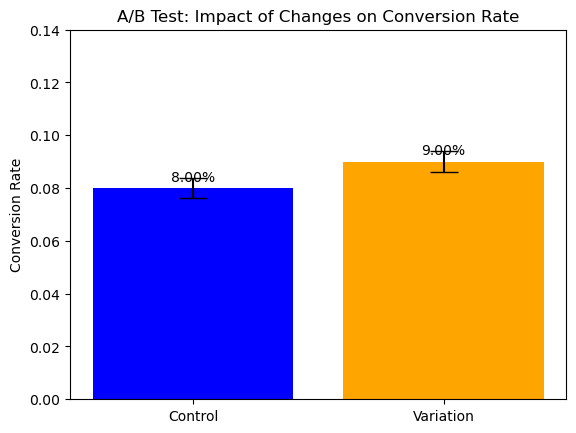

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Data 
control_visitors = 5000
control_conversions = 400
variation_visitors = 5000
variation_conversions = 450

# Calculate conversion rates
control_rate = control_conversions / control_visitors
variation_rate = variation_conversions / variation_visitors

# Calculate standard errors
se_control = np.sqrt((control_rate * (1 - control_rate)) / control_visitors)
se_variation = np.sqrt((variation_rate * (1 - variation_rate)) / variation_visitors)
se_difference = np.sqrt(se_control**2 + se_variation**2)

# Calculate the Z-score
z_score = (variation_rate - control_rate) / se_difference

# Calculate the p-value
p_value = stats.norm.sf(abs(z_score)) * 2  # two-tailed test

# Results
print(f"Control Conversion Rate: {control_rate:.4%}")
print(f"Variation Conversion Rate: {variation_rate:.4%}")
print(f"Z-Score: {z_score:.4f}")
print(f"P-Value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The change has a significant impact on conversion rate.")
else:
    print("Fail to reject the null hypothesis: The change does not have a significant impact on conversion rate.")

# Plotting the conversion rates with error bars
labels = ['Control', 'Variation']
conversion_rates = [control_rate, variation_rate]
errors = [se_control, se_variation]

fig, ax = plt.subplots()

bars = ax.bar(labels, conversion_rates, yerr=errors, capsize=10, color=['blue', 'orange'])

# Adding text for labels, title and axes ticks
ax.set_ylabel('Conversion Rate')
ax.set_title('A/B Test: Impact of Changes on Conversion Rate')
ax.set_ylim([0, max(conversion_rates) + 0.05]) 

# Annotate bars with conversion rates
for bar, rate in zip(bars, conversion_rates):
    height = bar.get_height()
    ax.annotate(f'{rate:.2%}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


Control Conversion Rate: 0.0500
Treatment Conversion Rate: 0.0600
Z-Score: 1.9621
P-Value: 0.0498
Reject the null hypothesis: There is a significant difference between the two conversion rates.


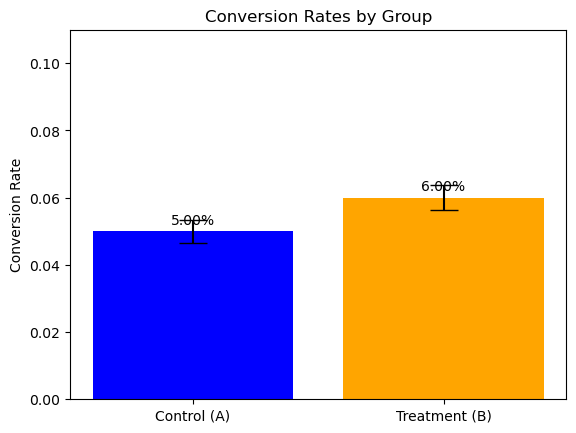

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Data 
control_conversions = 200  
control_visitors = 4000   
treatment_conversions = 240 
treatment_visitors = 4000   

# Conversion rates
control_rate = control_conversions / control_visitors
treatment_rate = treatment_conversions / treatment_visitors

# Standard error calculation
se_control = np.sqrt((control_rate * (1 - control_rate)) / control_visitors)
se_treatment = np.sqrt((treatment_rate * (1 - treatment_rate)) / treatment_visitors)
standard_error = np.sqrt(se_control**2 + se_treatment**2)

# Z-score calculation
z_score = (treatment_rate - control_rate) / standard_error

# P-value calculation
p_value = stats.norm.sf(abs(z_score)) * 2  # two-tailed test

# Results
print(f"Control Conversion Rate: {control_rate:.4f}")
print(f"Treatment Conversion Rate: {treatment_rate:.4f}")
print(f"Z-Score: {z_score:.4f}")
print(f"P-Value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two conversion rates.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two conversion rates.")

# Plotting the conversion rates
labels = ['Control (A)', 'Treatment (B)']
conversion_rates = [control_rate, treatment_rate]
errors = [se_control, se_treatment]

fig, ax = plt.subplots()

bars = ax.bar(labels, conversion_rates, yerr=errors, capsize=10, color=['blue', 'orange'])

# Adding text for labels, title and axes ticks
ax.set_ylabel('Conversion Rate')
ax.set_title('Conversion Rates by Group')
ax.set_ylim([0, max(conversion_rates) + 0.05])  

# Annotate bars with conversion rates
for bar, rate in zip(bars, conversion_rates):
    height = bar.get_height()
    ax.annotate(f'{rate:.2%}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()
